# Figure 3: Basement elevations and sediment thickness
This notebook produces figure 3 of Tankersley et al. 2022.
The figure displays the main results of our study, for the Ross Ice Shelf, merged with Ross Sea data.

In [1]:
# import necessary python packages
import pygmt
import pandas as pd
import geopandas as gpd
import os

In [2]:
# all file paths assume this notebook is in /RIS_basement_sediment/figures
pwd = os.getcwd()
pwd

'C:\\Users\\mtankersley\\Documents\\Python_Scripts\\RIS_basement_sediment\\Figures'

## Prep data

In [3]:
# create East vs West Antarctic subsets for Ross Ice Shelf area, used for colorbar histograms
!gmt grdmask ..\data\shapefiles\RIS_outline.shp -G..\data/tmp\RIS_mask.nc -I5000+e -R-3330000/1900000/-3330000/1850000 -rp -NNaN/1/1
!gmt grdmask ..\data\shapefiles\WANT_RIS.shp -G..\data/tmp\WANT_mask.nc -I5000+e -R-3330000/1900000/-3330000/1850000 -rp -NNaN/1/1
!gmt grdmask ..\data\shapefiles\WANT_RIS.shp -G..\data/tmp\EANT_mask.nc -I5000+e -R-3330000/1900000/-3330000/1850000 -rp -N1/NaN/NaN

!gmt grdmath -Df ..\data\main_results\Ross_Embayment_basement_filt.nc ..\data/tmp\RIS_mask.nc MUL = ..\data/tmp\Ross_Embayment_basement_filt_RIS_mask.nc
!gmt grdmath -Df ..\data/tmp\Ross_Embayment_basement_filt_RIS_mask.nc ..\data/tmp\WANT_mask.nc MUL = ..\data/tmp\Ross_Embayment_basement_filt_RIS_WANT_mask.nc
!gmt grdmath -Df ..\data/tmp\Ross_Embayment_basement_filt_RIS_mask.nc ..\data/tmp\EANT_mask.nc MUL = ..\data/tmp\Ross_Embayment_basement_filt_RIS_EANT_mask.nc

!gmt grdmath -Df ..\data\main_results\Ross_Embayment_sediment.nc ..\data/tmp\RIS_mask.nc MUL = ..\data/tmp\Ross_Embayment_sediment_RIS_mask.nc
!gmt grdmath -Df ..\data/tmp\Ross_Embayment_sediment_RIS_mask.nc ..\data/tmp\WANT_mask.nc MUL = ..\data/tmp\Ross_Embayment_sediment_RIS_WANT_mask.nc
!gmt grdmath -Df ..\data/tmp\Ross_Embayment_sediment_RIS_mask.nc ..\data/tmp\EANT_mask.nc MUL = ..\data/tmp\Ross_Embayment_sediment_RIS_EANT_mask.nc

## Color scales

In [4]:
# create colorscales
# imagery
pygmt.makecpt(series = '15000/17000/1', cmap = 'gray', 
              continuous = True, output = '../data/plotting/moa.cpt')
# basement
pygmt.makecpt(series = '-4000/0/17+n', cmap='batlowW',
              background='o', output='../data/plotting/basement.cpt')
# sediment
sed_cmap_lim='0/3500' 
pygmt.makecpt(cmap = 'acton', series = str(sed_cmap_lim)+'/15+n', reverse = True,
              output = '../data/plotting/sediment.cpt', background='o')  


## Figure parameters

In [5]:
# set our PyGMT figure parameters, 
# we will use an Antarctic Polar Stereographic projection (EPSG3031)
# set the region of our figure, in meters from the South Pole
e_lim= -760_000
n_lim= -2_200_000
w_lim= 600_000
s_lim= -350_000

fig_height=180 # in mm

# calculate figure width and map scale
fig_width=fig_height*(w_lim-e_lim)/(s_lim-n_lim)
fig_ratio = (s_lim - n_lim) / (fig_height/1000)

# Make a GMT region string and projection strings in both ESPG3031 and Lat/Lon
fig_reg = str(e_lim) + '/' + str(w_lim) + '/' + str(n_lim) + '/' + str(s_lim)
fig_proj = "x1:" + str(fig_ratio)
fig_proj_ll = "s0/-90/-71/1:" + str(fig_ratio)

## Make figure

C:\Users\mtankersley\miniforge3\envs\pygmt06\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
C:\Users\mtankersley\miniforge3\envs\pygmt06\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
C:\Users\mtankersley\miniforge3\envs\pygmt06\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
C:\Users\mtankersley\miniforge3\envs\pygmt06\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropri

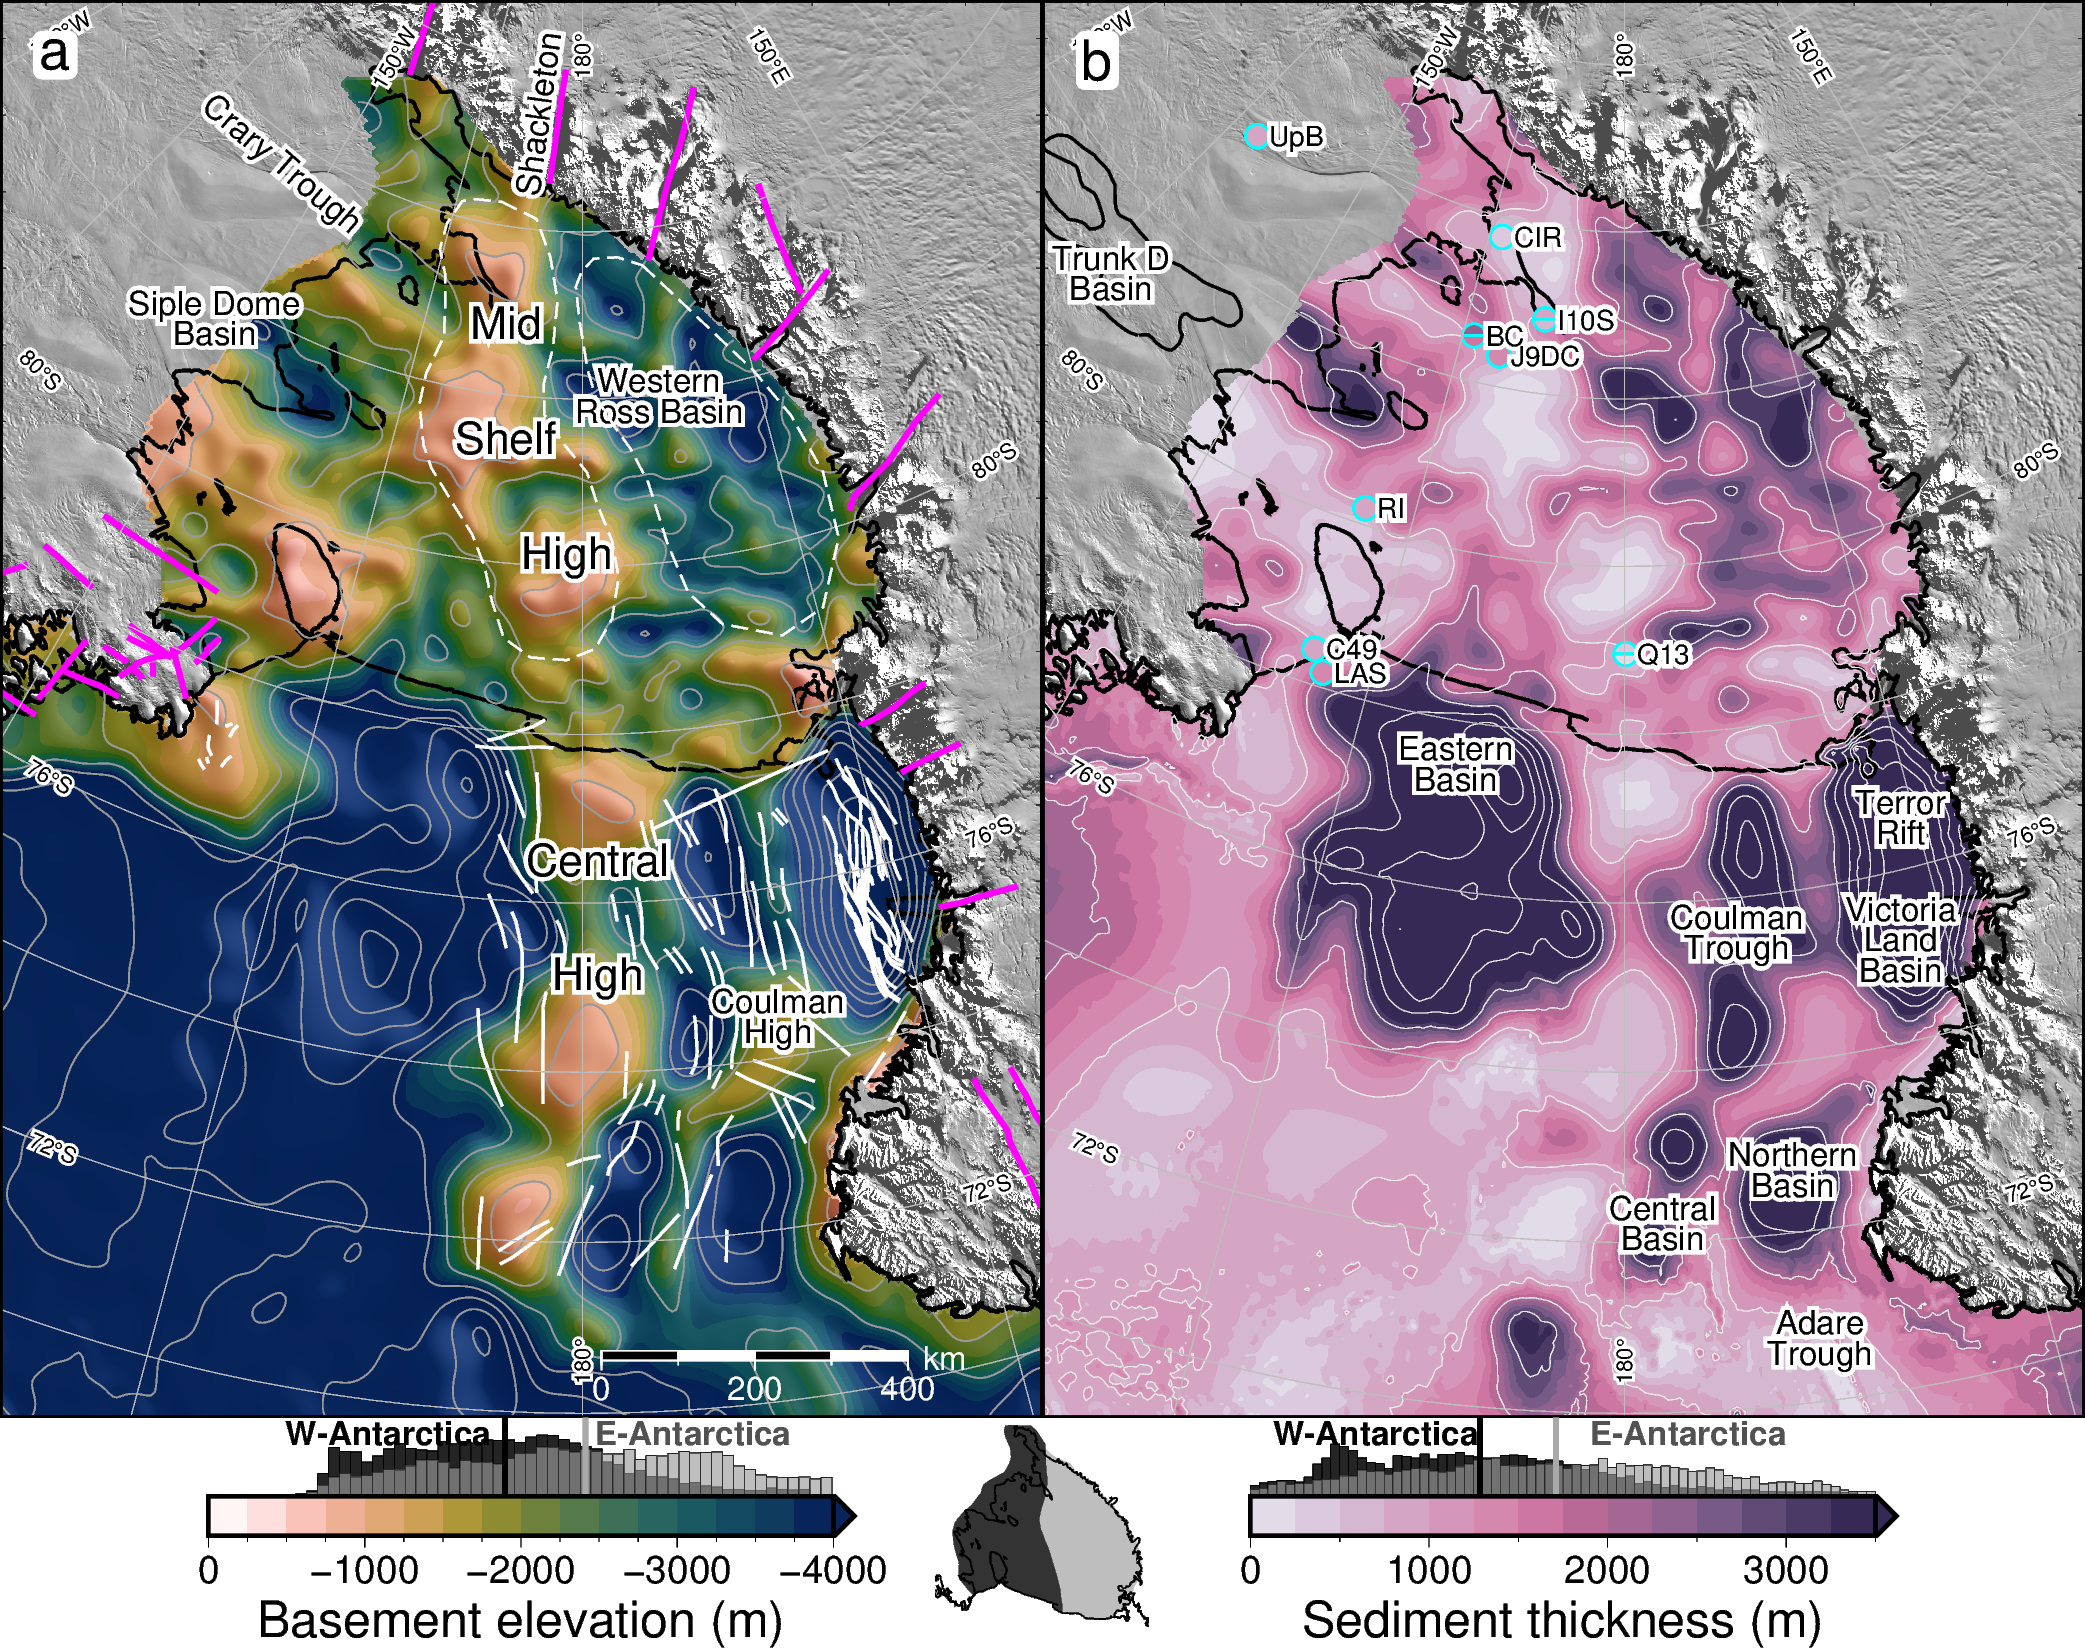

In [12]:
# initialize the figure
fig = pygmt.Figure()

# plot imagery as the basemap
with pygmt.config(MAP_FRAME_TYPE = 'inside'):
    fig.grdimage(region = fig_reg, projection = fig_proj, frame=["nwse", "xf100000", "yf100000", "g0"],  
                 grid ='../data/input/moa750_2009_hp1_v1.1.tif', 
                 cmap = '../data/plotting/moa.cpt', transparency=30)

# plot basement grid     
fig.grdimage(projection = fig_proj, 
             grid = '../data/main_results/Ross_Embayment_basement_filt.nc', 
             cmap = '../data/plotting/basement.cpt', 
             shading="grdgradient+a45+ne.5+m-.2", 
             dpi='500', nan_transparent=True)

# plot groundingline and coastlines
fig.plot(data=gpd.read_file('../data/shapefiles/GroundingLine_Antarctica_v02.shp'), 
         pen = '1.2p,black', verbose='e')
fig.plot(data=gpd.read_file('../data/shapefiles/Coastline_Antarctica_v02.shp'), 
         pen='1.2p,black', verbose='e')


# plot basement contours
fig.grdcontour(grid='../data/main_results/Ross_Embayment_basement_filt.nc', 
               interval=1000, pen='thinner,grey60')
 
# plot Sauli et al. 2021 Terror Rift Faults.
fig.plot(data = gpd.read_file('../data/shapefiles/Sauli_2021_faults.shp'), pen = 'thick,white')
# plot Chiappini 2002 Ross Fault (Behrendt 1996)
fig.plot(data = gpd.read_file('../data/shapefiles/chiappini_2002_Ross_Fault.shp'), pen = 'thick,white')
# plot Salvini 1997 others faults, W-RS, excluded Terror Rift
fig.plot(data = gpd.read_file('../data/shapefiles/salvini_1997_other_faults_no_TR.shp'), pen = 'thick,white')

# plot Goodge 2020 Faults, TAM
fig.plot(data = gpd.read_file('../data/shapefiles/goodge_faults.shp'), pen = 'thickest,magenta')

# plot Luyendyk et al. 2001 Faults, offshore EDVII
fig.plot(data = gpd.read_file('../data/shapefiles/luyendyk_2001_faults.shp'), pen = 'thick,white')
# plot Siddoway et al. 2008 Faults, EVII
fig.plot(data = gpd.read_file('../data/shapefiles/siddoway_2008_EVII_faults.shp'),pen = 'thickest,magenta')
# plot Ferraccioli et al. 2002 Faults, EVII
fig.plot(data = gpd.read_file('../data/shapefiles/ferraccioli_2002_faults.shp'), pen = 'thickest,magenta')

# plot graticules overtop, at 4d latitude and 30d longitude
with pygmt.config(MAP_ANNOT_OFFSET_PRIMARY = '-2p', MAP_FRAME_TYPE = 'inside',
                  MAP_ANNOT_OBLIQUE = 0, FONT_ANNOT_PRIMARY = '8p,black,-=2p,white', 
                  MAP_GRID_PEN_PRIMARY = 'grey', MAP_TICK_LENGTH_PRIMARY = '-10p',
                  MAP_TICK_PEN_PRIMARY = 'thinnest,grey', FORMAT_GEO_MAP = 'dddF',
                  MAP_POLAR_CAP = '90/90', ):
    fig.basemap(projection = fig_proj_ll, region = fig_reg,
                frame = ["NSWE", "xa30g15", "ya4g2"], verbose='e')
    with pygmt.config(FONT_ANNOT_PRIMARY = '8p,black'):
        fig.basemap(projection = fig_proj_ll, region = fig_reg,
                frame = ["NSWE", "xa30", "ya4"], verbose='e')

# Add location labels, with white shadow
fig.text(textfiles="../data/plotting/place_labels_Fig3a.tsv",
         projection = fig_proj,
         angle=True,
         font= '12,Helvetica,black,-=3p,white',
         justify=True,)
fig.text(textfiles="../data/plotting/place_labels_Fig3a.tsv",
         projection = fig_proj,
         angle=True,
         font= '12p,Helvetica,black',
         justify=True,) 

# plot MSH outline
fig.plot(data = gpd.read_file('../data/shapefiles/MSH.shp'), pen = '.75p,white,-')

# plot Western Ross Basin outline
fig.plot(data = gpd.read_file('../data/shapefiles/WSB.shp'), pen = '.75p,white,-')

# Add MSH and CH location labels
fig.text(textfiles="../data/plotting/MSH_CH.tsv",
         projection = fig_proj,
         angle=True,
         font= '16,Helvetica,black,-=3p,white',
         justify=True,)
fig.text(textfiles="../data/plotting/MSH_CH.tsv",
         projection = fig_proj,
         angle=True,
         font= '16p,Helvetica,black',
         justify=True,) 

# plot figure label "a"
fig.text(projection = fig_proj, 
            region = fig_reg,
            position='TL',
            text = "a",
            fill = 'white',
            font = '20p,Helvetica,black',
            offset = 'j.5/.5',
            clearance = '+tO')

# plot scalebar
with pygmt.config(FONT_ANNOT_PRIMARY = '12p,white', FONT_LABEL = '12p,white', MAP_SCALE_HEIGHT='7p', MAP_TICK_PEN_PRIMARY = '0.5p,white'):
    fig.basemap(projection = fig_proj_ll, map_scale='jBR+w400k+c170E/71S+f+l"km"+ar+o1.7c/0.6c',verbose='e')
    
# plot colorbar, with histograms of east vs west side data
barwidth = fig_width/10 * 0.6 # color bar width is 60% of the map width, in cm
bar_offset= (fig_width/10 - (barwidth))/2 # offset so bar is centered
pos_str = 'jBL+w' + str(-barwidth) + 'c/.5c+jTL+o'+str(bar_offset)+'c/1c+h+eb'
# shift origin down to make space for histograms
fig.shift_origin(xshift=str(bar_offset)+'c', yshift="-1c",)
# set region for histogram plot
hist_reg1 = '0/4000/0/5' # this needs to match CMAP limits, 0/5 represent 0-5%, postive since we want the color bar reversed
# get East Antarctic side data values, negate so lines up with cbar
EANT_basement=pygmt.grd2xyz(grid='..\data/tmp\Ross_Embayment_basement_filt_RIS_EANT_mask.nc')
EANT_basement.z=EANT_basement.z*-1
# get West Antarctic side data values, negate so lines up with cbar
WANT_basement=pygmt.grd2xyz(grid='..\data/tmp\Ross_Embayment_basement_filt_RIS_WANT_mask.nc')
WANT_basement.z=WANT_basement.z*-1
# plot histograms, East, then West, then East again with transparency
fig.histogram( data=EANT_basement.z,
                region=hist_reg1,
                fill='grey',
                projection="X"+str(barwidth)+"c/1c",
                frame=False,
                series=70,
                pen=".1p",
                histtype=1,
                transparency=0) 
fig.histogram( data=WANT_basement.z,
                region=hist_reg1,
                fill='gray14',
                projection="X"+str(barwidth)+"c/1c",
                frame=False,
                series=70,
                pen=".1p",
                histtype=1,
                transparency=0)  
fig.histogram( data=EANT_basement.z,
                region=hist_reg1,
                fill='grey',
                projection="X"+str(barwidth)+"c/1c",
                frame=False,
                series=70,
                pen=".1p",
                histtype=1,
                transparency=50) 
# plot mean values
fig.plot(region=hist_reg1,x=[WANT_basement.z.mean(),WANT_basement.z.mean()], y=[0,5], pen='2p,black')
fig.plot(region=hist_reg1,x=[EANT_basement.z.mean(),EANT_basement.z.mean()], y=[0,5], pen='2p,darkgray')
# add mean value labels
fig.text(x=1150, y=4,
        text = "W-Antarctica",
        font = '12p,Helvetica-Bold,black') 
fig.text(x=3100, y=4,
        text = "E-Antarctica",
        font = '12p,Helvetica-Bold,gray32')
# shift origin back up
fig.shift_origin(xshift='-'+str(bar_offset)+'c', yshift="1c",)
# add colorbar ontop
with pygmt.config(FONT_ANNOT_PRIMARY = '14p,black', FONT_LABEL = '18p,black'):
    fig.colorbar(cmap='../data/plotting/basement.cpt', position = pos_str, frame=['xa1000f250+l"Basement elevation (m)"'], verbose='e')  

#################
#################
# shift origin to right, and start plot panel b
#################
#################  

fig.shift_origin(xshift=fig_width/10)


# plot imagery as the basemap
with pygmt.config(MAP_FRAME_TYPE = 'inside'):
    fig.grdimage(region = fig_reg, projection = fig_proj, frame=["nwse", "xf100000", "yf100000", "g0"], 
                 grid ='../data/input/moa750_2009_hp1_v1.1.tif', 
                 cmap = '../data/plotting/moa.cpt', dpi='500', transparency=30)

# plot sediment thickness grid
fig.grdimage(projection = fig_proj, grid='../data/main_results/Ross_Embayment_sediment.nc', cmap='../data/plotting/sediment.cpt', nan_transparent=True, dpi='500')

# plot groundingline and coastlines
fig.plot(data=gpd.read_file('../data/shapefiles/GroundingLine_Antarctica_v02.shp'), 
         pen = '1.2p,black', verbose='e')
fig.plot(data=gpd.read_file('../data/shapefiles/Coastline_Antarctica_v02.shp'), 
         pen='1.2p,black', verbose='e')

# plot sediment thickness contours
fig.grdcontour(grid='../data/main_results/Ross_Embayment_sediment.nc', 
               interval=1000, pen='thinnest,gray92') 

# plot previous seismics basement points
stations=pd.read_csv('../data/input/RIS_Basement_Sedthickness_Seismics.csv', header=0, skiprows=[6], engine='python')
stations['sed_max']=stations.sed_thickness + stations.Uncertainty
stations['sed_min']=stations.sed_thickness - stations.Uncertainty
stations_max = stations[['X','Y','sed_max']].copy()
stations_max['start']=0
stations_max['stop']=180
stations_min = stations[['X','Y','sed_min']].copy()
stations_min['start']=180
stations_min['stop']=360
# as circles, with upper and lower error limits
fig.plot(projection = fig_proj,
         data=stations_max,
         pen = '.8p,cyan',
         cmap = '../data/plotting/sediment.cpt',
         style = 'w0.3c')
fig.plot(data=stations_min,
         pen = '.8p,cyan',
         cmap = '../data/plotting/sediment.cpt',
         style = 'w0.3c')
fig.plot(x=stations.X[stations.sed_min==stations.sed_max],
         y=stations.Y[stations.sed_min==stations.sed_max],
         color=stations.sed_min[stations.sed_min==stations.sed_max],
         pen = '.8p,cyan',
         cmap = '../data/plotting/sediment.cpt',
         style = 'c0.3c')

# plot graticules overtop, at 4d latitude and 30d longitude
with pygmt.config(MAP_ANNOT_OFFSET_PRIMARY = '-2p', MAP_FRAME_TYPE = 'inside',
                  MAP_ANNOT_OBLIQUE = 0, FONT_ANNOT_PRIMARY = '8p,black,-=2p,white', 
                  MAP_GRID_PEN_PRIMARY = 'grey', MAP_TICK_LENGTH_PRIMARY = '-10p',
                  MAP_TICK_PEN_PRIMARY = 'thinnest,grey', FORMAT_GEO_MAP = 'dddF',
                  MAP_POLAR_CAP = '90/90', ):
    fig.basemap(projection = fig_proj_ll, region = fig_reg,
                frame = ["NSWE", "xa30g15", "ya4g2"], verbose='e')
    with pygmt.config(FONT_ANNOT_PRIMARY = '8p,black'):
        fig.basemap(projection = fig_proj_ll, region = fig_reg,
                frame = ["NSWE", "xa30", "ya4"], verbose='e')  

# plot seismic station labels
fig.text(projection = fig_proj,
         x = stations.X,
         y = stations.Y,
         text = stations["Stations ID"],
         font = '10p,Helvetica,black,-=3p,white',
         justify = 'ML',
         offset = 'j0.15c/0c',)
fig.text(x = stations.X,
         y = stations.Y,
         text = stations["Stations ID"],
         font = '10p,Helvetica,black',
         justify = 'ML',
         offset = 'j0.15c/0c',)

# plot figure label "b"
fig.text(projection = fig_proj, 
        region = fig_reg,
        position='TL',
        text = "b",
        fill = 'white',
        font = '20p,Helvetica,black',
        offset = 'j.5/.5',
        clearance = '+tO')

# plot Bell et al. 2006 Basins
fig.plot(data=gpd.read_file('../data/shapefiles/bell_2006_outline.shp'), pen = 'thick,black')

# plot location labels, with white shadow
fig.text(textfiles="../data/plotting/place_labels_Fig3b.tsv",
         projection = fig_proj,
         angle=True,
         font='12p,Helvetica,black,-=3p,white',
         justify=True)
fig.text(textfiles="../data/plotting/place_labels_Fig3b.tsv",
         projection = fig_proj,
         angle=True,
         font='12p,Helvetica,black',
         justify=True)

# plot colorbar, with histograms of east vs west side data
pos_str = 'jBL+w' + str(barwidth) + 'c/.5c+jTL+o'+str(bar_offset)+'c/1c+h+ef' 
hist_reg = str(sed_cmap_lim)+'/0/5',   # this needs to match CMAP limits, 0/5 represent 0-5%
fig.shift_origin(xshift=str(bar_offset)+'c', yshift="-1c",)
WANT_sediment=pygmt.grd2xyz(grid='..\data/tmp\Ross_Embayment_sediment_RIS_WANT_mask.nc')
EANT_sediment=pygmt.grd2xyz(grid='..\data/tmp\Ross_Embayment_sediment_RIS_EANT_mask.nc')
# plot histograms, East, then West, then East again with transparency
fig.histogram( data=EANT_sediment.z,
                region=hist_reg,
                fill='grey',
                projection="X"+str(barwidth)+"c/1c",
                frame=False,
                series=50,#width of bin in data units
                pen=".1p",
                histtype=1,
                transparency=0) 
fig.histogram( data=WANT_sediment.z,
                region=hist_reg,
                fill='gray14',
                projection="X"+str(barwidth)+"c/1c",
                frame=False,
                series=50,
                pen=".1p",
                histtype=1,
                transparency=0) 
fig.histogram( data=EANT_sediment.z,
                region=hist_reg,
                fill='grey',
                projection="X"+str(barwidth)+"c/1c",
                frame=False,
                series=50,
                pen=".1p",
                histtype=1,
                transparency=50) 

fig.plot(region=hist_reg,x=[WANT_sediment.z.mean(),WANT_sediment.z.mean()], y=[0,5], pen='2p,black')
fig.plot(region=hist_reg,x=[EANT_sediment.z.mean(),EANT_sediment.z.mean()], y=[0,5], pen='2p,darkgray')
  
fig.text(x=700, y=4,
        text = "W-Antarctica",
        font = '12p,Helvetica-Bold,black')
fig.text(x=2450,y=4,
        text = "E-Antarctica",
        font = '12p,Helvetica-Bold,gray32')

fig.shift_origin(xshift='-'+str(bar_offset)+'c', yshift="1c",)

with pygmt.config(FONT_ANNOT_PRIMARY = '14p,black', FONT_LABEL = '18p,black'):
    fig.colorbar(cmap='../data/plotting/sediment.cpt', position = pos_str, frame=['xa1000f500+l"Sediment thickness (m)"'], verbose='e')

# add inset map showing East vs. West Antarctic seperation used for histograms
shelfwidth = 2.7 # width of inset in cm
shelfreg = '-690000/431000/-1390000/-374000'
shelfmap = 'X' + str(shelfwidth) + 'c'

with fig.inset(position='JTL+jCM+w'+str(shelfwidth)+'c+o0c/-2.3c'):
    fig.plot(projection = shelfmap, region = shelfreg, data = gpd.read_file('../data/shapefiles/RIS_East.shp'), color = "gray", transparency = 0)
    fig.plot(data = gpd.read_file('../data/shapefiles/RIS_West.shp'), color = "gray20", transparency = 0)
    fig.plot(data = gpd.read_file('../data/shapefiles/Groundingline_Antarctica_v02.shp'), pen='0.5p,black')
    fig.plot(data = gpd.read_file('../data/shapefiles/Coastline_Antarctica_v02.shp'), pen='0.5p,black')
fig.show(dpi=200)

## Save figure

In [13]:
out='outputs/Fig3_basement_sediment.jpg'
fig.savefig(out, dpi=200)

In [14]:
print('EANT sediment thickness mean:\n',EANT_sediment.z.mean(),'\n')
print('WANT sediment thickness mean:\n',WANT_sediment.z.mean(),'\n')
print('EANT basement mean:\n',EANT_basement.z.mean(),'\n')
print('WANT basement mean:\n',WANT_basement.z.mean(),'\n')

EANT sediment thickness mean:
 1711.3423197157006 

WANT sediment thickness mean:
 1286.0646327146083 

EANT basement mean:
 2414.0535238218167 

WANT basement mean:
 1898.259989501253 

